In [1]:
import sys, os

In [2]:
# run_path = '/home/harishbabu/projects/PIPNet/runs/010-CUB-27-imgnet_OOD_cnext26_img=224_nprotos=20'
# run_path = '/home/harishbabu/projects/PIPNet/runs/031-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = '/home/harishbabu/projects/PIPNet/runs/032-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/035-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/043-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = "/home/harishbabu/projects/PIPNet/runs/036-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel_uniformity"
# run_path = "/home/harishbabu/projects/PIPNet/runs/041-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/042-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/044-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20-or-4per-desc_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/046-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=10per-desc_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/047-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc"
# run_path = "/home/harishbabu/projects/PIPNet/runs/048-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc_unit-sphere"
# run_path = "/home/harishbabu/projects/PIPNet/runs/051-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/052-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/055-CUB-18_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/056-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/057-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/058-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"

# with unit sphere
# run_path = "/home/harishbabu/projects/PIPNet/runs/059-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# unit sphere with softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/065-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# original hpipnet with 20 protos per node no KO, no OOD, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/062-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD"

# original hpipnet with 20 protos per node no KO, no OOD, WITH tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/063-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD_tanh-desc"

# with unit sphere but no AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/066-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_no-align_no-uni_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc, INCORRECT
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-incorrect-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, no softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/068-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# 071 with bias
# run_path = "/home/harishbabu/projects/PIPNet/runs/071-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_with-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 072 gumbel softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/072-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 073 gumbel softmax, tau-1.0
# run_path = "/home/harishbabu/projects/PIPNet/runs/073-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax-tau=1_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 075 068 with focal loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/075-068-with-focal_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 076 cs followed by softmax. Uses align_pf along with align+uni
# run_path = "/home/harishbabu/projects/PIPNet/runs/076_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2-APW=5_batch=20"

# 074 multiply_cs_softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/074-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_multi-cs-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 077 unit sphere protopool with cosin no softmax constant 20 protos per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/077_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 080 unit sphere protopool with cosin and softmax constant 20 protos per node (other details not sure)
# run_path = "/home/harishbabu/projects/PIPNet/runs/080-CUB-18-imgnet_with-equalize-aug_cnext7_img=224_nprotos=20_unit-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_weighted-ce_batch=20"

# 082 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/082-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 083 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/083-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_no-align_no-uni_no-mm-loss_batch=48"

# 085 unit sphere cs followed by softmax-with-tau with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/085-notebook-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=12"

# 091 basic gaussian multiplier on stage 4
# run_path = "/home/harishbabu/projects/PIPNet/runs/091-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=256_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 092 basic gaussian multiplier on stage 3, 4
# run_path = "/home/harishbabu/projects/PIPNet/runs/092-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=3,4|1.0|50_img=224_latent-dim=256_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 093 128 dim linear
# run_path = "/home/harishbabu/projects/PIPNet/runs/093-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=128_nprotos=20_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=1-CW=2_mm-loss_batch=48"

# 094 128 dim linear
# run_path = "/home/harishbabu/projects/PIPNet/runs/094-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_latent-dim=128_nprotos=20_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=1-CW=2_mm-loss_batch=48"

# 095 ablation 091 without AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/095-091-woALUNI-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_no-AL_no-UNI_mm-loss_batch=48"

# 096 ablation 091 without AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/096-091-wfocal-CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 097 - 091 with bg
# run_path = "/home/harishbabu/projects/PIPNet/runs/097-091-wbg-CUB-18_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 0100 cub29 with 20 per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/100_CUB-29-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=20_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 0101 baseline with 4 per desc per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/101-baseline-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_no-KO_no-OOD"

# 0103 091 with 20 per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/103-091-wProtoPool20PerNode_CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=20_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_batch=48"

# 098 091 without AL + UNI
# run_path = '/home/harishbabu/projects/PIPNet/runs/098-091-woALUNI_finetune=0_CUB-18-imgnet_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=4per-leaf-desc_unit-sphere_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48'

# 0107 091 with 20 per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/107-baseline_LOU_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD"

# 109 flat structure 18 species - HPIPNet
# run_path = '/home/harishbabu/projects/PIPNet/runs/109-FlatStructure180protos_CUB-18-imgnet-bg_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=180_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_batch=48'

# 110 flat structure 18 species - HPIPNet no AL+UNI
# run_path = '/home/harishbabu/projects/PIPNet/runs/110-FlatStructure180protosNoALUNI_CUB-18-imgnet-bg_with-equalize-aug_cnext26_BGM=4|1.0|50_img=224_nprotos=180_unit-sphere-protopool_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_batch=48'

# 111 flat structure 18 species - Naive-HPIPNet
# run_path = '/home/harishbabu/projects/PIPNet/runs/111-NaiveHPIPNetFlatStructure180-baseline_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=180_no-KO_no-OOD'

# 112 flat structure 190 species - Naive-HPIPNet
# run_path = "/home/harishbabu/projects/PIPNet/runs/112-NaiveHPIPNetFlatStructure_CUB-190-imgnet-224_with-equalize-aug_cnext26_img=224_nprotos=768_no-KO_no-OOD"

# 113 flat structure 190 species - Naive-HPIPNet no AL_PF+TANH
# run_path = "/home/harishbabu/projects/PIPNet/runs/113-NaiveHPIPNetFlatStructureNoAlNoTanh_CUB-190-imgnet-224_with-equalize-aug_cnext26_img=224_nprotos=768_no-KO_no-OOD_no-AL_no-TANH"

# 116 BYOL Optimizer 2
# run_path = '/home/harishbabu/projects/PIPNet/runs/116-HPIPNetBYOLOpt2_CUB-18-imgnet-224_with-equalize-aug_cnext26_img=224_nprotos=20_BYOL_no-KO_no-OOD_no-AL_no-TANH'

# 118 Project dist with BYOL, HPIPNetBYOLOpt2ProtopoolProjDist
# run_path = "/home/harishbabu/projects/PIPNet/runs/118-HPIPNetBYOLOpt2ProtopoolProjDist_CUB-18-imgnet-224_with-equalize-aug_cnext26_img=224_nprotos=20_BYOL_no-KO_no-OOD_no-AL_no-TANH"

# 126 BYOL with CL with ClusDesc only backpropagating CL
# run_path = '/home/harishbabu/projects/PIPNet/runs/126-checkingBYOL05_bpOnlyCLNotClusDesc_with-CL-ClusDesc_byol=2'

# 127 Just CL and ClusDesc, no BYOL
# run_path = '/home/harishbabu/projects/PIPNet/runs/127-HPIPNetwCLwClusDesc_noBYOL_CUB-18-imgnet-224_with-equalize-aug_cnext26_img=224_nprotos=20'

# 137 Naive HPIPNet frozen backbone
# run_path = "/home/harishbabu/projects/PIPNet/runs/137-NaiveHPIPNetFrozenBackbone_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# 138 Naive HPIPNet with TanhDesc loss
run_path = "/home/harishbabu/projects/PIPNet/runs/138-NaiveHPIPNetwithTanhDesc_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

# 142 ConciseProtoPNet
run_path = "/home/harishbabu/projects/PIPNet/runs/142-ConciseProtoPNet_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20"

try:
    sys.path.remove('/home/harishbabu/projects/PIPNet')
except:
    pass
sys.path.insert(0, os.path.join(run_path, 'source_clone'))


In [3]:
print(run_path)

/home/harishbabu/projects/PIPNet/runs/142-ConciseProtoPNet_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20


In [4]:
import torch.nn as nn
import torch

import sys, os
import random
import numpy as np
from shutil import copy
import matplotlib.pyplot as plt
from copy import deepcopy

from omegaconf import OmegaConf
import shutil
import pickle
import random
from tqdm import tqdm

from torchvision.datasets.folder import ImageFolder
from torch.utils.data import DataLoader
# from skimage.filters import threshold_local, gaussian
import ntpath

In [5]:
print(sys.path)

['/home/harishbabu/projects/PIPNet/runs/142-ConciseProtoPNet_cnext26_CUB-18-imgnet-224_with-equalize-aug_img=224_nprotos=20/source_clone', '/home/harishbabu/.conda/envs/hpnet4/lib/python39.zip', '/home/harishbabu/.conda/envs/hpnet4/lib/python3.9', '/home/harishbabu/.conda/envs/hpnet4/lib/python3.9/lib-dynload', '', '/home/harishbabu/.conda/envs/hpnet4/lib/python3.9/site-packages']


In [6]:
# import pipnet.pipnet
# from pipnet.pipnet import PIPNet, get_network
# # from pipnet import pipnet
# print(pipnet.__file__)
from util import node
print(node.__file__)

/home/harishbabu/projects/PIPNet/util/node.py


In [7]:
from pipnet.pipnet import PIPNet, get_network
from util.log import Log
from util.args import get_args, save_args, get_optimizer_nn
from util.data import get_dataloaders
from util.func import init_weights_xavier
from pipnet.train import train_pipnet, test_pipnet
# from pipnet.test import eval_pipnet, get_thresholds, eval_ood
from util.eval_cub_csv import eval_prototypes_cub_parts_csv, get_topk_cub, get_proto_patches_cub
from util.vis_pipnet import visualize, visualize_topk
from util.visualize_prediction import vis_pred, vis_pred_experiments
from util.node import Node
from util.phylo_utils import construct_phylo_tree, construct_discretized_phylo_tree
from util.func import get_patch_size
from util.data import ModifiedLabelLoader

Heatmaps showing where a prototype is found will not be generated because OpenCV is not installed.


In [8]:
from PIL import Image
import numpy as np
import pdb

def get_heatmap(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

def get_bb_gaussian_threshold(latent_activation, sigma=1.0, percentile=97, extend_h=0, extend_w=0):
    # latent_activation -> []
    upscaled_similarity = get_upscaled_activation_uninterpolated(latent_activation, \
                                                                 image_size=(args.image_size, args.image_size))
    upscaled_similarity = minmaxscale(upscaled_similarity)
    upscaled_similarity = gaussian(upscaled_similarity, sigma=sigma)
    upscaled_similarity = threshold_local(upscaled_similarity, block_size=15, method='mean')
    h_min, h_max, w_min, w_max = find_top_percentile_bbox(upscaled_similarity ,percentile=97)
    h_min = max(0, h_min-extend_h)
    h_max = min(upscaled_similarity.shape[0], h_max+extend_h)
    w_min = max(0, w_min-extend_w)
    w_max = min(upscaled_similarity.shape[1], w_max+extend_w)
    return h_min, h_max, w_min, w_max


def minmaxscale(tensor):
    return (tensor - tensor.min()) / (tensor.max() - tensor.min())

from torch.utils.data import DataLoader, SequentialSampler
from torch.utils.data import DataLoader

def unshuffle_dataloader(dataloader):
    if type(dataloader.dataset) == ImageFolder:
        dataset = dataloader.dataset
    else:
        dataset = dataloader.dataset.dataset.dataset
    new_dataloader = DataLoader(
        dataset=dataset,
        batch_size=dataloader.batch_size,
        shuffle=False,
        num_workers=dataloader.num_workers,
        pin_memory=dataloader.pin_memory,
        drop_last=dataloader.drop_last,
        timeout=dataloader.timeout,
        worker_init_fn=dataloader.worker_init_fn,
        multiprocessing_context=dataloader.multiprocessing_context,
        generator=dataloader.generator,
        prefetch_factor=dataloader.prefetch_factor,
        persistent_workers=dataloader.persistent_workers
    )
    return new_dataloader

## Load Model

In [9]:
args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
args = pickle.load(args_file)

if args.phylo_config:
    phylo_config = OmegaConf.load(args.phylo_config)

if args.phylo_config:
    # construct the phylo tree
    if phylo_config.phyloDistances_string == 'None':
        if '031' in run_path: # this run uses a different phylogeny file that had an extra root node which is a mistake
            root = construct_phylo_tree('/home/harishbabu/data/phlyogenyCUB/18Species-with-extra-root-node/1_tree-consensus-Hacket-18Species-modified_cub-names_v1.phy')
        else:
            root = construct_phylo_tree(phylo_config.phylogeny_path)
        print('-'*25 + ' No discretization ' + '-'*25)
    else:
        root = construct_discretized_phylo_tree(phylo_config.phylogeny_path, phylo_config.phyloDistances_string)
        print('-'*25 + ' Discretized ' + '-'*25)
else:
    # construct the tree (original hierarchy as described in the paper)
    root = Node("root")
    root.add_children(['animal','vehicle','everyday_object','weapon','scuba_diver'])
    root.add_children_to('animal',['non_primate','primate'])
    root.add_children_to('non_primate',['African_elephant','giant_panda','lion'])
    root.add_children_to('primate',['capuchin','gibbon','orangutan'])
    root.add_children_to('vehicle',['ambulance','pickup','sports_car'])
    root.add_children_to('everyday_object',['laptop','sandal','wine_bottle'])
    root.add_children_to('weapon',['assault_rifle','rifle'])
    # flat root
    # root.add_children(['scuba_diver','African_elephant','giant_panda','lion','capuchin','gibbon','orangutan','ambulance','pickup','sports_car','laptop','sandal','wine_bottle','assault_rifle','rifle'])
root.assign_all_descendents()

exp_no = int(os.path.basename(run_path)[:3])

if exp_no < 77:
    if ('num_protos_per_descendant' in args) and (args.num_protos_per_descendant > 0):
        for node in root.nodes_with_children():
            node.set_num_protos(args.num_protos_per_descendant)
if exp_no == 77:
    # update num of protos per node based on num_protos_per_descendant
    if args.num_features == 0 and args.num_protos_per_descendant == 0:
        raise Exception('Either of num_features or num_protos_per_descendant must be greater than zero')
    for node in root.nodes_with_children():
        node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                                                            min_protos=args.num_features)
else:
    if ('num_protos_per_descendant' in args):
        # update num of protos per node based on num_protos_per_descendant
        if args.num_features == 0 and args.num_protos_per_descendant == 0:
            raise Exception('Either of num_features or num_protos_per_descendant must be greater than zero')
        for node in root.nodes_with_children():
            node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                                min_protos=args.num_features,\
                                split_protos=('protopool' in args) and (args.protopool == 'n'))

------------------------- No discretization -------------------------


In [10]:
!which python

/home/harishbabu/.conda/envs/hpnet4/bin/python


In [11]:
args.batch_size = 1

print(args.batch_size)
print(args.dataset)

1
CUB-18-224


In [12]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    device_ids = [torch.cuda.current_device()]
else:
    device = torch.device('cpu')
    device_ids = []

# args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
# args = pickle.load(args_file)

# ckpt_file_name = 'net_overspecific_pruned_replaced_thresh=0.5_last'
ckpt_file_name = 'net_trained_30'
# ckpt_file_name = 'net_trained_10'
# ckpt_file_name = 'net_pretrained'
epoch = ckpt_file_name.split('_')[-1]

ckpt_path = os.path.join(run_path, 'checkpoints', ckpt_file_name)
checkpoint = torch.load(ckpt_path, map_location=device)

if ckpt_file_name != 'net_trained_last':
    print('\n', (10*'-')+'WARNING: Not using the final trained model'+(10*'-'), '\n')

# Obtain the dataset and dataloaders
trainloader, trainloader_pretraining, trainloader_normal, trainloader_normal_augment, projectloader, testloader, test_projectloader, classes = get_dataloaders(args, device)

print(args.batch_size, trainloader.batch_size)

if len(classes)<=20:
    if args.validation_size == 0.:
        print("Classes: ", testloader.dataset.class_to_idx, flush=True)
    else:
        print("Classes: ", str(classes), flush=True)

# Create a convolutional network based on arguments and add 1x1 conv layer
feature_net, add_on_layers, pool_layer, classification_layers, num_prototypes = get_network(len(classes), args, root=root)
   
# Create a PIP-Net
net = PIPNet(num_classes=len(classes),
                    num_prototypes=num_prototypes,
                    feature_net = feature_net,
                    args = args,
                    add_on_layers = add_on_layers,
                    pool_layer = pool_layer,
                    classification_layers = classification_layers,
                    num_parent_nodes = len(root.nodes_with_children()),
                    root = root
                    )

# Create a PIP-Net
if ('byol' in args) and (args.byol == 'y'):
    from pipnet.pipnet import PIPNetBYOL
    net = PIPNetBYOL(num_classes=len(classes),
                        num_prototypes=num_prototypes,
                        feature_net = feature_net,
                        args = args,
                        add_on_layers = add_on_layers,
                        pool_layer = pool_layer,
                        classification_layers = classification_layers,
                        num_parent_nodes = len(root.nodes_with_children()),
                        root = root
                        )
else:
    net = PIPNet(num_classes=len(classes),
                    num_prototypes=num_prototypes,
                    feature_net = feature_net,
                    args = args,
                    add_on_layers = add_on_layers,
                    pool_layer = pool_layer,
                    classification_layers = classification_layers,
                    num_parent_nodes = len(root.nodes_with_children()),
                    root = root
                    )
        
net = net.to(device=device)
net = nn.DataParallel(net, device_ids = device_ids)    
net.load_state_dict(checkpoint['model_state_dict'],strict=True)
print(net.eval())
criterion = nn.NLLLoss(reduction='mean').to(device)

# Forward one batch through the backbone to get the latent output size
# with torch.no_grad():
#     xs1, _, _ = next(iter(trainloader))
#     xs1 = xs1.to(device)
#     proto_features, _, _ = net(xs1)
#     wshape = proto_features['root'].shape[-1]
#     args.wshape = wshape #needed for calculating image patch size
#     print("Output shape: ", proto_features['root'].shape, flush=True)
    
args.wshape = 26


 ----------WARNING: Not using the final trained model---------- 

IMPORTANT: Transform2 disabled
IMPORTANT: Transform2 disabled
Dropping 0 samples from trainloader
Dropping 0 samples from trainloader_normal
Dropping 0 samples from trainloader_normal_augment
Num classes (k) =  18 ['cub_001_Black_footed_Albatross', 'cub_002_Laysan_Albatross', 'cub_003_Sooty_Albatross', 'cub_004_Groove_billed_Ani', 'cub_023_Brandt_Cormorant'] etc.
1 1
Classes:  {'cub_001_Black_footed_Albatross': 0, 'cub_002_Laysan_Albatross': 1, 'cub_003_Sooty_Albatross': 2, 'cub_004_Groove_billed_Ani': 3, 'cub_023_Brandt_Cormorant': 4, 'cub_024_Red_faced_Cormorant': 5, 'cub_025_Pelagic_Cormorant': 6, 'cub_031_Black_billed_Cuckoo': 7, 'cub_032_Mangrove_Cuckoo': 8, 'cub_033_Yellow_billed_Cuckoo': 9, 'cub_045_Northern_Fulmar': 10, 'cub_050_Eared_Grebe': 11, 'cub_051_Horned_Grebe': 12, 'cub_052_Pied_billed_Grebe': 13, 'cub_053_Western_Grebe': 14, 'cub_086_Pacific_Loon': 15, 'cub_100_Brown_Pelican': 16, 'cub_101_White_Pelica

In [13]:
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.__version__)

True
11.7
2.0.1+cu117


In [14]:
args.basic_cnext_gaussian_multiplier

''

In [15]:
# def count_parameters(model):
#     """
#     Counts the number of trainable and non-trainable parameters in a model.
    
#     Parameters:
#     - model: The PyTorch model
    
#     Returns:
#     - Tuple of (total_parameters, trainable_parameters)
#     """
#     total_params = sum(p.numel() for p in model.parameters())
#     trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
#     return total_params, trainable_params

# count_parameters(net.module._net)

dinov2_vits14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14_reg').cuda()

dinov2_vits14_reg

with torch.no_grad():
    xs1, _, _ = next(iter(trainloader))
    xs1 = xs1.to(device)
    out = dinov2_vits14_reg(xs1)
#     wshape = proto_features['root'].shape[-1]
#     args.wshape = wshape #needed for calculating image patch size
#     print("Output shape: ", proto_features['root'].shape, flush=True)

Using cache found in /home/harishbabu/.cache/torch/hub/facebookresearch_dinov2_main
/home/harishbabu/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/harishbabu/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:27: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/harishbabu/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:33: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


# Proto activations on leaf descendents - topk images using either NAIVE-HPIPNET or UNIT-SPACE-PROTOPOOL with HEATMAP (CANON)

In [15]:
# Proto activations on leaf descendents - topk images

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision
import torch.nn.functional as F



def find_top_percentile_bbox(image, percentile=95):
    threshold = np.percentile(image.flatten(), percentile)
    mask = image >= threshold
    coords = np.argwhere(mask)
    if coords.size == 0:
        return None, None, None, None
    h_min, w_min = coords.min(axis=0)
    h_max, w_max = coords.max(axis=0)
    h_min, h_max, w_min, w_max = map(int, [h_min, h_max, w_min, w_max])
    return h_min, h_max, w_min, w_max

def find_high_activation_crop(activation_map, percentile=95):
    threshold = np.percentile(activation_map, percentile)
    mask = np.ones(activation_map.shape)
    mask[activation_map < threshold] = 0
    lower_y, upper_y, lower_x, upper_x = 0, 0, 0, 0
    for i in range(mask.shape[0]):
        if np.amax(mask[i]) > 0.5:
            lower_y = i
            break
    for i in reversed(range(mask.shape[0])):
        if np.amax(mask[i]) > 0.5:
            upper_y = i
            break
    for j in range(mask.shape[1]):
        if np.amax(mask[:,j]) > 0.5:
            lower_x = j
            break
    for j in reversed(range(mask.shape[1])):
        if np.amax(mask[:,j]) > 0.5:
            upper_x = j
            break
    return lower_y, upper_y+1, lower_x, upper_x+1

def get_upscaled_activation_uninterpolated(latent_activation, image_size):
    image_a = latent_activation.cpu().numpy()
    min_image_a = image_a.min()
    max_image_a = image_a.max()
    image_a = (image_a - min_image_a) / (max_image_a - min_image_a)
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((image_size[-1], \
                                                                                            image_size[-2]), \
                                                                                          resample=Image.NEAREST ))
    reshaped_image_a = (reshaped_image_a / 255).astype('float16')
    reshaped_image_a = (reshaped_image_a * (max_image_a - min_image_a)) + min_image_a
    return reshaped_image_a

# added for NUMPY SAVING
def get_upscaled_activation_interpolated(latent_activation, image_size):
    image_a = latent_activation.cpu().numpy()
    min_image_a = image_a.min()
    max_image_a = image_a.max()
    image_a = (image_a - min_image_a) / (max_image_a - min_image_a)
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((image_size[-1], \
                                                                                            image_size[-2])))    
    reshaped_image_a = (reshaped_image_a / 255).astype('float16')
    reshaped_image_a = (reshaped_image_a * (max_image_a - min_image_a)) + min_image_a
    return reshaped_image_a

def functional_UnitConv2D(in_features, weight, bias, stride = 1, padding=0):
    normalized_weight = F.normalize(weight.data, p=2, dim=(1, 2, 3)) # Normalize the kernels to unit vectors
    normalized_input = F.normalize(in_features, p=2, dim=1) # Normalize the input to unit vectors
    if bias is not None:
        normalized_bias = F.normalize(bias.data, p=2, dim=0) # Normalize the kernels to unit vectors
    else:
        normalized_bias = None
    return F.conv2d(normalized_input, normalized_weight, normalized_bias, stride=stride, padding=padding)

def findCorrespondingToMax(base, target):
    output, indices = F.max_pool2d(base, kernel_size=(26, 26), return_indices=True)# these are logits
    tensor_flattened = target.view(target.shape[0], target.shape[1], -1)
    indices_flattened = indices.view(target.shape[0], target.shape[1], -1)
    corresponding_values_in_target = torch.gather(tensor_flattened, 2, indices_flattened)
    corresponding_values_in_target = corresponding_values_in_target.view(target.shape[0],\
                                     target.shape[1], 1, 1)
    pooled_target = corresponding_values_in_target
    return pooled_target

def customForwardWithCSandSoftmax(net, xs,  inference=False):
    features = net.module._net(xs) 
    proto_features = {}
    proto_features_cs = {}
    proto_features_softmaxed = {}
    pooled = {}
    pooled_cs = {}
    pooled_softmaxed = {}
    out = {}
    for node in net.module.root.nodes_with_children():
        # this may or may not be cosine similarity based on UniConv2D or Conv2d
        proto_features[node.name] = getattr(net.module, '_'+node.name+'_add_on')(features)
        
        #calculating cosine similarity
        prototypes = getattr(net.module, '_'+node.name+'_add_on')
        proto_features_cs[node.name] = functional_UnitConv2D(features, prototypes.weight, prototypes.bias)

        if net.module.args.softmax.split('|')[0] == 'y':
            if len(net.module.args.softmax.split('|')) > 1:
                softmax_tau = int(net.module.args.softmax.split('|')[1])
            else:
                softmax_tau = 0.2
            if ('y' in net.module.args.conc_log_ip):
                # softmax over the channel instead of over the patch
                B, C, H, W = proto_features[node.name].shape
                proto_features[node.name] = proto_features[node.name].reshape(B, C, -1)
                proto_features_softmaxed[node.name] = F.softmax(proto_features[node.name], dim=-1)
                proto_features_softmaxed[node.name] = proto_features_softmaxed[node.name].reshape(B, C, H, W)
                proto_features[node.name] = proto_features_softmaxed[node.name]
            else:
                proto_features[node.name] = proto_features[node.name] / softmax_tau
                proto_features_softmaxed[node.name] = net.module._softmax(proto_features[node.name])
                proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'
                
            # proto_features[node.name] = proto_features[node.name] / softmax_tau
            # proto_features_softmaxed[node.name] = net.module._softmax(proto_features[node.name])
            # proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'
        elif net.module.args.gumbel_softmax == 'y':
            proto_features_softmaxed[node.name] = net.module._gumbel_softmax(proto_features[node.name])
            proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'

        if net.module.args.multiply_cs_softmax == 'y':
            proto_features[node.name] = proto_features_cs[node.name] * proto_features_softmaxed[node.name]
        pooled[node.name] = net.module._pool(proto_features[node.name])
        
        # this could be softmax or cosine similarity
        pooled_cs[node.name] = findCorrespondingToMax(base=proto_features[node.name], \
                                                     target=proto_features_cs[node.name])
        
        # only if the model uses softmax or gumbel softmax
        if (net.module.args.softmax == 'y') or (net.module.args.gumbel_softmax == 'y'):
            pooled_softmaxed[node.name] = findCorrespondingToMax(base=proto_features[node.name], \
                                                         target=proto_features_softmaxed[node.name])

        if inference:
            pooled[node.name] = torch.where(pooled[node.name] < 0.1, 0., pooled[node.name])  #during inference, ignore all prototypes that have 0.1 similarity or lower
        out[node.name] = getattr(net.module, '_'+node.name+'_classification')(pooled[node.name]) #shape (bs*2, num_classes) # these are logits
    """
    features -> Raw features generated by the backbone before the prototype layer
    proto_features -> Output of prototype layer (UnitConv2D or Conv2D based on the network configuration used), and softmaxed
    proto_features_cs -> Cosine similarity between features and prototypes
    proto_features_softmaxed -> Same as proto_features
    pooled -> max pooled on proto_features
    pooled_cs -> cosine values corresponding to max indices in proto_features
    """
    return features, proto_features, proto_features_cs, proto_features_softmaxed, pooled, pooled_cs, pooled_softmaxed, out
#     return features, proto_features, pooled, pooled_cs, pooled_softmaxed, out

def customForwardWithProjDistandSoftmax(net, xs,  inference=False):
    features = net.module._net(xs) 
    proto_features = {}
    proto_features_cs = {}
    proto_features_softmaxed = {}
    pooled = {}
    pooled_cs = {}
    pooled_softmaxed = {}
    out = {}
    for node in net.module.root.nodes_with_children():
        # this may or may not be cosine similarity based on UniConv2D or Conv2d
        proto_features[node.name] = getattr(net.module, '_'+node.name+'_add_on')(features)
        
        #calculating cosine similarity
        prototypes = getattr(net.module, '_'+node.name+'_add_on')
        proto_features_cs[node.name] = functional_UnitConv2D(features, prototypes.weight, prototypes.bias)

        if net.module.args.softmax == 'y':
            softmax_tau = 0.2
            proto_features[node.name] = proto_features[node.name] / softmax_tau
            proto_features_softmaxed[node.name] = net.module._softmax(proto_features[node.name])
            proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'
        elif net.module.args.gumbel_softmax == 'y':
            proto_features_softmaxed[node.name] = net.module._gumbel_softmax(proto_features[node.name])
            proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'

        if net.module.args.multiply_cs_softmax == 'y':
            proto_features[node.name] = proto_features_cs[node.name] * proto_features_softmaxed[node.name]
        pooled[node.name] = net.module._pool(proto_features[node.name])
        
        # this could be softmax or cosine similarity
        pooled_cs[node.name] = findCorrespondingToMax(base=proto_features[node.name], \
                                                     target=proto_features_cs[node.name])
        
        # only if the model uses softmax or gumbel softmax
        if (net.module.args.softmax == 'y') or (net.module.args.gumbel_softmax == 'y'):
            pooled_softmaxed[node.name] = findCorrespondingToMax(base=proto_features[node.name], \
                                                         target=proto_features_softmaxed[node.name])

        if inference:
            pooled[node.name] = torch.where(pooled[node.name] < 0.1, 0., pooled[node.name])  #during inference, ignore all prototypes that have 0.1 similarity or lower
        out[node.name] = getattr(net.module, '_'+node.name+'_classification')(pooled[node.name]) #shape (bs*2, num_classes) # these are logits
    """
    features -> Raw features generated by the backbone before the prototype layer
    proto_features -> Output of prototype layer (UnitConv2D or Conv2D based on the network configuration used), and softmaxed
    proto_features_cs -> Cosine similarity between features and prototypes
    proto_features_softmaxed -> Same as proto_features
    pooled -> max pooled on proto_features
    pooled_cs -> cosine values corresponding to max indices in proto_features
    """
    return features, proto_features, proto_features_cs, proto_features_softmaxed, pooled, pooled_cs, pooled_softmaxed, out

find_non_descendants = False # True, False # param
vizloader_name = 'projectloader' #'testloader' # 'projectloader'
bbox_percentile = 97
topk = 6 # param, args param
save_images = True #True, False
save_activation_as_npy_path = '_'.join(['activation_as_npy', vizloader_name]) # activation_as_npy, added for NUMPY SAVING
if find_non_descendants and (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = save_activation_as_npy_path + '_non_desc'
analysis_mode = True

font = ImageFont.truetype("arial.ttf", 50)
font2 = ImageFont.truetype("arial.ttf", 20)
font3 = ImageFont.truetype("arial.ttf", 30)

from datetime import datetime
txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
txt_file.write('\n')

def write_num_proto_details(proto_mean_activations, node_name, net, threshold, txt_file, args):
    
    rand_input = torch.randn((1, 3, args.image_size, args.image_size))
    with torch.no_grad():
        *_, pooled, out = net(rand_input)
    num_protos = pooled[node_name].shape[1]
    used_protos = len(proto_mean_activations)
    non_overspecific = 0
    for p in proto_mean_activations:
        logstr = '\t'*2 + f'Proto:{p} '
        protos_mean_for_all_leaf_descedants = []
        for leaf_descendent in proto_mean_activations[p]:
            mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
            protos_mean_for_all_leaf_descedants.append(mean_activation)
            
        if all([(mean_activation>0.2) for mean_activation in protos_mean_for_all_leaf_descedants]):
            non_overspecific += 1
            
    txt_file.write(f"Node:{node_name},Total:{num_protos},Used:{used_protos},Good:{non_overspecific},threshold={threshold}\n")


def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)



vizloader_dict = {'trainloader': trainloader,
                 'projectloader': projectloader,
                 'testloader': testloader,
                 'test_projectloader': test_projectloader}
vizloader_dict[vizloader_name] = unshuffle_dataloader(vizloader_dict[vizloader_name])


if type(vizloader_dict[vizloader_name].dataset) == ImageFolder:
    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
else:
    name2label = vizloader_dict[vizloader_name].dataset.dataset.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}

for node in root.nodes_with_children():
    
#     if node.name == 'root':
#         print('-'*25, 'Skipping root node', '-'*25)
#         continue

#     non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
#     if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
#         continue

#     name2label = projectloader.dataset.class_to_idx # param
#     label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(vizloader_dict[vizloader_name], node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
        # change
#         if not find_non_descendants: 
#             # do only when finding descendants
#             if coarse_label2name[ys.item()] not in non_leaf_children_names:
#                 continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = customForwardWithCSandSoftmax(net, xs, inference=False)
            features, softmaxes, cosine_similarity, _, pooled, pooled_cs, pooled_softmaxed, out = model_output
#             _, softmaxes, pooled, pooled_ip, pooled_softmax, _ = model_output # features, proto_features, pooled, pooled_cs, pooled_softmaxed, out
#             model_output = net(xs, inference=False)
#             if len(model_output) == 3:
#                 softmaxes, pooled, _ = model_output
#             elif len(model_output) == 4:
#                 _, softmaxes, pooled, _ = model_output
            pooled = pooled[node.name].squeeze(0)
            pooled_cs = pooled_cs[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)
            cosine_similarity = cosine_similarity[node.name]

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
                # change
#                 if (len(relevant_proto_class_names) == 1):# and (relevant_proto_class_names[0] not in non_leaf_children_names):
#                     continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                latent_activation_cs = cosine_similarity[:, p, :, :]
                if not find_non_descendants:
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7] if analysis_mode else \
                                                label2name[orig_y.item()][4:]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), pooled_cs[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), \
                                               latent_activation, latent_activation_cs))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), pooled_cs[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), \
                                            latent_activation, latent_activation_cs))
                else:
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7] if analysis_mode else \
                                                label2name[orig_y.item()][4:]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), pooled_cs[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), \
                                               latent_activation, latent_activation_cs))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), pooled_cs[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), \
                                            latent_activation, latent_activation_cs))
                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)
                
    write_num_proto_details(proto_mean_activations, node.name, net, threshold=0.2, txt_file=txt_file, args=args)
    
    print('Node', node.name)
    for class_label in range(classification_weights.shape[0]):
        child_name = (coarse_label2name[class_label])
        print('Num protos for', child_name, torch.nonzero(classification_weights[class_label, :] > 1e-3).shape[0])
        
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            mean_activation_of_every_leaf = []
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
                mean_activation_of_every_leaf.append(mean_activation)
            print(logstr)
            
            # if the mean_activation is less for all leaf descendants skip the node
            if all([mean_act < 0.2 for mean_act in mean_activation_of_every_leaf]):
                if find_non_descendants:
                    print('\t'*2 + f'Not skipping proto {p} of {node.name} coz of find_non_descendants')
                else:
                    print('\t'*2 + f'Skipping proto {p} of {node.name}')
                    continue
            
            # have this for NON descendants
            if len(proto_mean_activations[p]) == 0:
                continue
            
            if save_images or save_activation_as_npy_path:
                patches = []
                right_descriptions = []
                text_region_width = 3 if analysis_mode else 2 # 3x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 2)
                    least_activation = min([round(activation, 2) for activation, *_ in proto_mean_activations[p][leaf_descendent]])
                    most_activation = max([round(activation, 2) for activation, *_ in proto_mean_activations[p][leaf_descendent]])
                    mean_cosine_similarity = round(np.mean([activation_inner_product for _, activation_inner_product, *_ in proto_mean_activations[p][leaf_descendent]]), 2)
                    # modified for NUMPY SAVING
                    for rank, ele in enumerate(heap):
                        
                        activation, activation_inner_product, img_to_open, \
                        (h_coor_min, h_coor_max, w_coor_min, w_coor_max), \
                        latent_activation, latent_activation_cs = ele
                        
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
#                         overlayed_image_np = get_heatmap(latent_activation, img_tensor)
#                         overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
#                         patches.append(overlayed_image)
                        
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        if analysis_mode:
                            overlayed_image_pil = Image.fromarray(overlayed_image_np)
                            draw = D.Draw(overlayed_image_pil)
                            text = f"{round(activation, 2), round(activation_inner_product, 2)}"
    #                         text_width, text_height = draw.textsize(text, font2)
                            bbox = draw.textbbox((0, 0), text, font2)
                            text_width = bbox[2] - bbox[0]
                            text_height = bbox[3] - bbox[1]
                            x, y = 224 - text_width - 5, 5  # 10 pixels padding from right
                            draw.text((x, y), text, font=font2, fill=(255, 255, 255))
                            overlayed_image_np = np.array(overlayed_image_pil)
                        
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.

                        # Commenting Bounding Boxes for now
                        # if analysis_mode:
                        #     upscaled_similarity = get_upscaled_activation_uninterpolated(latent_activation, image_size=(args.image_size, args.image_size))
                        #     h_min, h_max, w_min, w_max = get_bb_gaussian_threshold(latent_activation, sigma=1.0, \
                        #                                                            percentile=bbox_percentile, extend_h=0, extend_w=0)
                        #     bbox_coords = torch.tensor([[w_min, h_min, w_max, h_max]])
                        #     overlayed_image = torchvision.utils.draw_bounding_boxes((overlayed_image * 255).type(torch.uint8), \
                        #                                                                bbox_coords, colors='red') / 255
                        
#                         plt_image = overlayed_bb_image.permute(1, 2, 0)# should be H, W, C with 0 to 1
#                         plt.imshow(plt_image)
#                         plt.show()
#                         pdb.set_trace()
                        patches.append(overlayed_image)
                        # added for NUMPY SAVING
                        if save_activation_as_npy_path:
                            upscaled_similarity_interpolated = get_upscaled_activation_interpolated(latent_activation,
                                                                                       image_size=(args.image_size, args.image_size))
                            latent_activation_npy = latent_activation.squeeze().cpu().numpy()
                            latent_activation_cs_npy = latent_activation_cs.squeeze().cpu().numpy()
                            data = {'node_name': node.name,
                                    'proto_num': p,
                                    'child_name': child_classname,
                                    'leaf_desc': leaf_descendent,
                                     'rank': rank,
                                     'img_path': img_to_open,
                                     'img_filename': ntpath.basename(img_to_open),
                                     'activation': latent_activation_npy,
                                     'activation_cs': latent_activation_cs_npy,
                                     'max_activation': activation,
                                     'model_type': 'HPIPNET'}
                            filename = str(rank)+ '-' + ntpath.basename(img_to_open) + '.npy'
                            save_path = os.path.join(run_path, save_activation_as_npy_path, \
                                                     node.name, str(p), leaf_descendent,
                                                     filename)
                            os.makedirs(os.path.dirname(save_path), exist_ok=True)
                            np.save(save_path, data, allow_pickle=True)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}' if analysis_mode else \
                                f'{leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((200, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font3)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)
                
                # weird thing padding should be zero for non descendants else it raises some error # change
                if find_non_descendants or (len(patches) == topk): # (len(patches) == topk) means there is only one leaf descendant
                    padding = 0
                else:
                    padding = 1

                grid = torchvision.utils.make_grid(patches, nrow=topk, padding=padding)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=padding)

                # merging right description with the grid of images
                grid = torch.cat([grid_right_descriptions, grid], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}' if analysis_mode else \
                            f'Parent node:{node.name}, Child node:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], 75), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((500, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([txttensor, grid], dim=1)
                
                if save_images:
                    prefix = 'non_' if find_non_descendants else ''
                    os.makedirs(os.path.join(run_path, prefix + f'descendent_specific_topk_heatmap_{vizloader_name}_{bbox_percentile}_ep={epoch}_analysis={analysis_mode}', node.name), exist_ok=True)
                    torchvision.utils.save_image(grid, os.path.join(run_path, prefix + f'descendent_specific_topk_heatmap_{vizloader_name}_{bbox_percentile}_ep={epoch}_analysis={analysis_mode}', node.name, f'{child_classname}-p{p}.png'))

txt_file.write('\n')
txt_file.close()
print('Done !!!')

Node root
Num protos for 052+053 0
Num protos for 004+086 20
	 Child: 004+086
		Proto:0 001:(0.7804) 002:(0.8354) 003:(0.7654) 004:(0.3642) 023:(0.8477) 024:(0.9822) 025:(0.8649) 031:(0.131) 032:(0.0557) 033:(0.8126) 045:(0.7621) 086:(0.1739) 100:(0.0882) 101:(0.6159) 
		Proto:1 001:(0.9743) 002:(0.9782) 003:(0.9327) 004:(0.9285) 023:(0.9868) 024:(0.8813) 025:(0.9706) 031:(0.8881) 032:(0.6708) 033:(0.7893) 045:(0.9417) 086:(0.8563) 100:(0.9988) 101:(0.9963) 
		Proto:2 001:(0.8526) 002:(0.8741) 003:(0.8739) 004:(0.8192) 023:(0.9746) 024:(0.9227) 025:(0.9384) 031:(0.7284) 032:(0.3285) 033:(0.6757) 045:(0.5939) 086:(0.8478) 100:(0.9902) 101:(0.9441) 
		Proto:3 001:(0.8756) 002:(0.8277) 003:(0.7796) 004:(0.3616) 023:(0.8917) 024:(0.8333) 025:(0.8192) 031:(0.4242) 032:(0.2154) 033:(0.4046) 045:(0.7904) 086:(0.6141) 100:(0.9469) 101:(0.7297) 
		Proto:4 001:(0.9025) 002:(0.8249) 003:(0.7063) 004:(0.8648) 023:(0.8687) 024:(0.4911) 025:(0.616) 031:(0.912) 032:(0.2141) 033:(0.4745) 045:(0.9357) 

Node 052+053
Num protos for cub_052_Pied_billed_Grebe 0
Num protos for 053+050 20
	 Child: 053+050
		Proto:0 050:(0.9759) 051:(0.9489) 053:(0.9648) 
		Proto:1 050:(0.9662) 051:(0.8047) 053:(0.9306) 
		Proto:2 050:(0.991) 051:(0.9991) 053:(0.9496) 
		Proto:3 050:(0.9089) 051:(0.9352) 053:(0.8149) 
		Proto:4 050:(0.8991) 051:(0.9933) 053:(0.996) 
		Proto:5 050:(0.9257) 051:(0.8118) 053:(0.7027) 
		Proto:6 050:(0.9695) 051:(0.9937) 053:(0.0588) 
		Proto:7 050:(0.9758) 051:(0.9974) 053:(0.8938) 
		Proto:8 050:(0.9315) 051:(0.9971) 053:(0.9561) 
		Proto:9 050:(0.9964) 051:(0.9865) 053:(0.9808) 
		Proto:10 050:(0.9789) 051:(0.8758) 053:(0.9197) 
		Proto:11 050:(0.859) 051:(0.9712) 053:(0.0576) 
		Proto:12 050:(0.3934) 051:(0.9878) 053:(0.7922) 
		Proto:13 050:(0.6472) 051:(0.991) 053:(0.7611) 
		Proto:14 050:(0.9938) 051:(0.9363) 053:(0.9692) 
		Proto:15 050:(0.9976) 051:(0.9482) 053:(0.9675) 
		Proto:16 050:(0.9883) 051:(0.9817) 053:(0.9901) 
		Proto:17 050:(0.6672) 051:(0.9818) 053:(0.9794

Node 004+086
Num protos for 004+032 0
Num protos for 086+045 19
	 Child: 086+045
		Proto:0 001:(0.7652) 002:(0.9203) 003:(0.48) 023:(0.5392) 024:(0.9638) 025:(0.7518) 045:(0.8505) 086:(0.3669) 100:(0.6859) 101:(0.9571) 
		Proto:1 001:(0.9667) 002:(0.986) 003:(0.9551) 023:(0.9763) 024:(0.9508) 025:(0.8436) 045:(0.9748) 086:(0.9489) 100:(0.9201) 101:(0.9934) 
		Proto:2 001:(0.9304) 002:(0.9484) 003:(0.8837) 023:(0.7521) 024:(0.9642) 025:(0.8106) 045:(0.654) 086:(0.4521) 100:(0.9536) 101:(0.95) 
		Proto:3 001:(0.5848) 002:(0.7376) 003:(0.8099) 023:(0.9762) 024:(0.9713) 025:(0.8999) 045:(0.686) 086:(0.9544) 100:(0.6287) 101:(0.4186) 
		Proto:5 001:(0.754) 002:(0.7903) 003:(0.7109) 023:(0.9527) 024:(0.9782) 025:(0.9939) 045:(0.5367) 086:(0.9479) 100:(0.9438) 101:(0.6867) 
		Proto:6 001:(0.9885) 002:(0.9616) 003:(0.9658) 023:(0.9411) 024:(0.9038) 025:(0.8563) 045:(0.956) 086:(0.9839) 100:(0.9474) 101:(0.9828) 
		Proto:7 001:(0.651) 002:(0.8466) 003:(0.7421) 023:(0.9162) 024:(0.9434) 025:(0.9

Node 053+050
Num protos for cub_053_Western_Grebe 0
Num protos for 050+051 20
	 Child: 050+051
		Proto:0 050:(0.83) 051:(0.2189) 
		Proto:1 050:(0.9572) 051:(0.808) 
		Proto:2 050:(0.5378) 051:(0.9641) 
		Proto:3 050:(0.9485) 051:(0.9924) 
		Proto:4 050:(0.0061) 051:(0.8648) 
		Proto:5 050:(0.0035) 051:(0.9336) 
		Proto:6 050:(0.9934) 051:(0.998) 
		Proto:7 050:(0.9979) 051:(0.9996) 
		Proto:8 050:(0.0055) 051:(0.9538) 
		Proto:9 050:(0.9231) 051:(0.9918) 
		Proto:10 050:(0.0026) 051:(0.8186) 
		Proto:11 050:(0.0106) 051:(0.969) 
		Proto:12 050:(0.9861) 051:(0.9986) 
		Proto:13 050:(0.0047) 051:(0.8831) 
		Proto:14 050:(0.0045) 051:(0.9794) 
		Proto:15 050:(0.9287) 051:(0.9819) 
		Proto:16 050:(0.992) 051:(0.9963) 
		Proto:17 050:(0.6966) 051:(0.973) 
		Proto:18 050:(0.6994) 051:(0.9588) 
		Proto:19 050:(0.9744) 051:(0.9926) 


Node 004+032
Num protos for cub_004_Groove_billed_Ani 0
Num protos for 032+033 20
	 Child: 032+033
		Proto:0 031:(0.9748) 032:(0.8974) 033:(0.9837) 
		Proto:1 031:(0.7297) 032:(0.2114) 033:(0.6865) 
		Proto:2 031:(0.8338) 032:(0.3403) 033:(0.8615) 
		Proto:3 031:(0.7901) 032:(0.6229) 033:(0.9126) 
		Proto:4 031:(0.7628) 032:(0.0048) 033:(0.2499) 
		Proto:5 031:(0.9343) 032:(0.9081) 033:(0.9794) 
		Proto:6 031:(0.8892) 032:(0.884) 033:(0.9724) 
		Proto:7 031:(0.9797) 032:(0.9409) 033:(0.9911) 
		Proto:8 031:(0.9764) 032:(0.8035) 033:(0.9834) 
		Proto:9 031:(0.7248) 032:(0.1004) 033:(0.6255) 
		Proto:10 031:(0.945) 032:(0.4423) 033:(0.9161) 
		Proto:11 031:(0.962) 032:(0.1513) 033:(0.5284) 
		Proto:12 031:(0.9831) 032:(0.9624) 033:(0.998) 
		Proto:13 031:(0.8305) 032:(0.8528) 033:(0.9372) 
		Proto:14 031:(0.9302) 032:(0.0425) 033:(0.7417) 
		Proto:15 031:(0.9853) 032:(0.969) 033:(0.9978) 
		Proto:16 031:(0.7841) 032:(0.2878) 033:(0.9299) 
		Proto:17 031:(0.9155) 032:(0.0047) 033:(0.0787)

Node 086+045
Num protos for cub_086_Pacific_Loon 0
Num protos for 045+101 20
	 Child: 045+101
		Proto:0 001:(0.9729) 002:(0.9907) 003:(0.9414) 023:(0.7856) 024:(0.9575) 025:(0.8124) 045:(0.992) 100:(0.9747) 101:(0.9684) 
		Proto:1 001:(0.1254) 002:(0.8644) 003:(0.0248) 023:(0.1379) 024:(0.7429) 025:(0.1577) 045:(0.4526) 100:(0.6432) 101:(0.8516) 
		Proto:2 001:(0.3814) 002:(0.9351) 003:(0.0776) 023:(0.1723) 024:(0.8157) 025:(0.074) 045:(0.716) 100:(0.7876) 101:(0.926) 
		Proto:3 001:(0.9774) 002:(0.9797) 003:(0.7787) 023:(0.7058) 024:(0.9526) 025:(0.8722) 045:(0.8344) 100:(0.9527) 101:(0.892) 
		Proto:4 001:(0.5375) 002:(0.9375) 003:(0.784) 023:(0.6896) 024:(0.9576) 025:(0.5304) 045:(0.1989) 100:(0.9649) 101:(0.9498) 
		Proto:5 001:(0.9946) 002:(0.998) 003:(0.9387) 023:(0.9474) 024:(0.9988) 025:(0.9511) 045:(0.879) 100:(0.9989) 101:(0.928) 
		Proto:6 001:(0.9759) 002:(0.9789) 003:(0.9689) 023:(0.8399) 024:(0.957) 025:(0.8702) 045:(0.9726) 100:(0.9756) 101:(0.9483) 
		Proto:7 001:(0.998

Node 050+051
Num protos for cub_050_Eared_Grebe 8
Num protos for cub_051_Horned_Grebe 14
	 Child: cub_051_Horned_Grebe
		Proto:0 051:(0.9732) 
		Proto:1 051:(0.4986) 
		Proto:2 051:(0.8292) 
		Proto:5 051:(0.5769) 
		Proto:6 051:(0.9994) 
		Proto:8 051:(0.9291) 
		Proto:9 051:(0.8826) 
		Proto:10 051:(0.9882) 
		Proto:12 051:(0.9996) 
		Proto:16 051:(0.9969) 
		Proto:17 051:(0.9942) 
		Proto:19 051:(0.8765) 
	 Child: cub_050_Eared_Grebe
		Proto:3 050:(0.9999) 
		Proto:4 050:(0.9999) 
		Proto:13 050:(0.9934) 
		Proto:14 050:(1.0) 
		Proto:15 050:(0.8805) 
		Proto:18 050:(0.9998) 
	 Child: cub_050_Eared_Grebe, cub_051_Horned_Grebe
		Proto:11 050:(0.0051) 051:(0.0993) 
		Skipping proto 11 of 050+051
		Proto:7 050:(0.5373) 051:(0.0685) 


Node 032+033
Num protos for cub_032_Mangrove_Cuckoo 0
Num protos for 033+031 20
	 Child: 033+031
		Proto:0 031:(0.9621) 033:(0.3749) 
		Proto:1 031:(0.9416) 033:(0.2296) 
		Proto:2 031:(0.9575) 033:(0.6358) 
		Proto:3 031:(0.9432) 033:(0.1334) 
		Proto:4 031:(0.8031) 033:(0.6891) 
		Proto:5 031:(0.9412) 033:(0.4766) 
		Proto:6 031:(0.9776) 033:(0.7939) 
		Proto:7 031:(0.9218) 033:(0.0706) 
		Proto:8 031:(0.9468) 033:(0.8873) 
		Proto:9 031:(0.9968) 033:(0.247) 
		Proto:10 031:(0.9941) 033:(0.2195) 
		Proto:11 031:(0.808) 033:(0.3677) 
		Proto:12 031:(0.0458) 033:(0.9382) 
		Proto:13 031:(0.9965) 033:(0.8763) 
		Proto:14 031:(0.8924) 033:(0.2408) 
		Proto:15 031:(0.9255) 033:(0.0567) 
		Proto:16 031:(0.8794) 033:(0.8681) 
		Proto:17 031:(0.904) 033:(0.312) 
		Proto:18 031:(0.78) 033:(0.0214) 
		Proto:19 031:(0.9949) 033:(0.913) 


Node 045+101
Num protos for 045+003 0
Num protos for 101+023 18
	 Child: 101+023
		Proto:0 023:(0.5025) 024:(0.9742) 025:(0.8545) 100:(0.0116) 101:(0.0074) 
		Proto:1 023:(0.8525) 024:(0.9919) 025:(0.8854) 100:(0.9613) 101:(0.9331) 
		Proto:2 023:(0.4089) 024:(0.9874) 025:(0.8839) 100:(0.2795) 101:(0.1701) 
		Proto:3 023:(0.2256) 024:(0.9687) 025:(0.3872) 100:(0.6323) 101:(0.7376) 
		Proto:4 023:(0.9341) 024:(0.9914) 025:(0.9674) 100:(0.2302) 101:(0.9029) 
		Proto:5 023:(0.8386) 024:(0.9008) 025:(0.8602) 100:(0.9996) 101:(0.9836) 
		Proto:6 023:(0.9029) 024:(0.8273) 025:(0.8775) 100:(0.978) 101:(0.9867) 
		Proto:7 023:(0.9714) 024:(0.9697) 025:(0.9551) 100:(0.0039) 101:(0.0042) 
		Proto:8 023:(0.9841) 024:(0.9772) 025:(0.9583) 100:(0.0073) 101:(0.7763) 
		Proto:9 023:(0.9434) 024:(0.9891) 025:(0.931) 100:(0.0107) 101:(0.1558) 
		Proto:10 023:(0.9327) 024:(0.843) 025:(0.8916) 100:(0.9986) 101:(0.9533) 
		Proto:11 023:(0.0295) 024:(0.9875) 025:(0.2264) 100:(0.0072) 101:(0.8792) 
		Proto:

Node 033+031
Num protos for cub_033_Yellow_billed_Cuckoo 11
Num protos for cub_031_Black_billed_Cuckoo 10
	 Child: cub_031_Black_billed_Cuckoo
		Proto:0 031:(0.9124) 
		Proto:2 031:(0.9975) 
		Proto:5 031:(0.9975) 
		Proto:6 031:(0.9758) 
		Proto:11 031:(0.9987) 
		Proto:15 031:(0.9212) 
		Proto:16 031:(0.9506) 
		Proto:17 031:(0.9866) 
		Proto:18 031:(0.946) 
	 Child: cub_033_Yellow_billed_Cuckoo
		Proto:1 033:(0.8289) 
		Proto:3 033:(0.9898) 
		Proto:4 033:(0.9967) 
		Proto:8 033:(0.9982) 
		Proto:9 033:(0.9987) 
		Proto:10 033:(0.9833) 
		Proto:12 033:(0.9989) 
		Proto:13 033:(0.999) 
		Proto:14 033:(0.9829) 
		Proto:19 033:(0.9964) 
	 Child: cub_033_Yellow_billed_Cuckoo, cub_031_Black_billed_Cuckoo
		Proto:7 031:(0.0402) 033:(0.0106) 
		Skipping proto 7 of 033+031


Node 045+003
Num protos for cub_045_Northern_Fulmar 0
Num protos for 003+002 20
	 Child: 003+002
		Proto:0 001:(0.6153) 002:(0.319) 003:(0.6598) 
		Proto:1 001:(0.8705) 002:(0.9125) 003:(0.6642) 
		Proto:2 001:(0.9243) 002:(0.9625) 003:(0.9536) 
		Proto:3 001:(0.9732) 002:(0.9993) 003:(0.9957) 
		Proto:4 001:(0.9755) 002:(0.926) 003:(0.3608) 
		Proto:5 001:(0.1643) 002:(0.0814) 003:(0.8582) 
		Proto:6 001:(0.9975) 002:(0.926) 003:(0.9732) 
		Proto:7 001:(0.9547) 002:(0.9778) 003:(0.6022) 
		Proto:8 001:(0.8574) 002:(0.8719) 003:(0.9164) 
		Proto:9 001:(0.9968) 002:(0.9998) 003:(0.9845) 
		Proto:10 001:(0.9492) 002:(0.8363) 003:(0.6781) 
		Proto:11 001:(0.6728) 002:(0.4755) 003:(0.795) 
		Proto:12 001:(0.6497) 002:(0.8861) 003:(0.3066) 
		Proto:13 001:(0.9823) 002:(0.9787) 003:(0.9828) 
		Proto:14 001:(0.7769) 002:(0.8533) 003:(0.6767) 
		Proto:15 001:(0.9885) 002:(0.9877) 003:(0.9421) 
		Proto:16 001:(0.8871) 002:(0.8926) 003:(0.5032) 
		Proto:17 001:(0.9106) 002:(0.9285) 003:(0.1158) 

Node 101+023
Num protos for 101+100 0
Num protos for 023+025 20
	 Child: 023+025
		Proto:0 023:(0.9867) 024:(0.9515) 025:(0.9582) 
		Proto:1 023:(0.8104) 024:(0.9918) 025:(0.9185) 
		Proto:2 023:(0.7562) 024:(0.9992) 025:(0.7387) 
		Proto:3 023:(0.9331) 024:(0.9004) 025:(0.849) 
		Proto:4 023:(0.9252) 024:(0.9101) 025:(0.8348) 
		Proto:5 023:(0.908) 024:(0.995) 025:(0.9764) 
		Proto:6 023:(0.6787) 024:(0.9951) 025:(0.7497) 
		Proto:7 023:(0.6979) 024:(0.9967) 025:(0.6681) 
		Proto:8 023:(0.632) 024:(0.9934) 025:(0.8861) 
		Proto:9 023:(0.6359) 024:(0.8622) 025:(0.8616) 
		Proto:10 023:(0.9693) 024:(0.9989) 025:(0.9582) 
		Proto:11 023:(0.7342) 024:(0.8924) 025:(0.9008) 
		Proto:12 023:(0.8817) 024:(0.5638) 025:(0.719) 
		Proto:13 023:(0.927) 024:(0.9596) 025:(0.9075) 
		Proto:14 023:(0.918) 024:(0.9657) 025:(0.9209) 
		Proto:15 023:(0.1856) 024:(0.9902) 025:(0.4561) 
		Proto:16 023:(0.9982) 024:(0.9764) 025:(0.9844) 
		Proto:17 023:(0.2546) 024:(0.974) 025:(0.7186) 
		Proto:18 023:(0.8

Node 003+002
Num protos for cub_003_Sooty_Albatross 0
Num protos for 002+001 20
	 Child: 002+001
		Proto:0 001:(0.9983) 002:(0.9962) 
		Proto:1 001:(0.9448) 002:(0.8004) 
		Proto:2 001:(0.3707) 002:(0.9824) 
		Proto:3 001:(0.0586) 002:(0.9176) 
		Proto:4 001:(0.9523) 002:(0.8966) 
		Proto:5 001:(0.9608) 002:(0.5908) 
		Proto:6 001:(0.9955) 002:(0.933) 
		Proto:7 001:(0.6513) 002:(0.9728) 
		Proto:8 001:(0.0078) 002:(0.8906) 
		Proto:9 001:(0.9954) 002:(0.9984) 
		Proto:10 001:(0.9901) 002:(0.9362) 
		Proto:11 001:(0.0109) 002:(0.7812) 
		Proto:12 001:(0.9334) 002:(0.9916) 
		Proto:13 001:(0.9958) 002:(0.9928) 
		Proto:14 001:(0.8737) 002:(0.7154) 
		Proto:15 001:(0.0054) 002:(0.9407) 
		Proto:16 001:(0.5692) 002:(0.9811) 
		Proto:17 001:(0.9783) 002:(0.9542) 
		Proto:18 001:(0.9115) 002:(0.943) 
		Proto:19 001:(0.9345) 002:(0.9381) 


Node 101+100
Num protos for cub_101_White_Pelican 14
Num protos for cub_100_Brown_Pelican 6
	 Child: cub_101_White_Pelican
		Proto:0 101:(0.9983) 
		Proto:1 101:(0.9999) 
		Proto:2 101:(0.9951) 
		Proto:4 101:(0.9516) 
		Proto:5 101:(0.9891) 
		Proto:6 101:(0.9993) 
		Proto:7 101:(0.9944) 
		Proto:8 101:(0.9866) 
		Proto:10 101:(0.9983) 
		Proto:11 101:(0.9936) 
		Proto:12 101:(0.9988) 
		Proto:16 101:(0.9664) 
		Proto:18 101:(0.9998) 
		Proto:19 101:(0.9967) 
	 Child: cub_100_Brown_Pelican
		Proto:3 100:(1.0) 
		Proto:9 100:(0.9732) 
		Proto:13 100:(0.9804) 
		Proto:14 100:(0.9973) 
		Proto:15 100:(0.9028) 
		Proto:17 100:(0.995) 


Node 023+025
Num protos for cub_023_Brandt_Cormorant 0
Num protos for 025+024 20
	 Child: 025+024
		Proto:0 024:(0.9549) 025:(0.4229) 
		Proto:1 024:(0.998) 025:(0.2847) 
		Proto:2 024:(0.9981) 025:(0.2388) 
		Proto:3 024:(0.9849) 025:(0.7242) 
		Proto:4 024:(0.9822) 025:(0.0569) 
		Proto:5 024:(0.9384) 025:(0.0043) 
		Proto:6 024:(0.9327) 025:(0.0528) 
		Proto:7 024:(0.7253) 025:(0.6395) 
		Proto:8 024:(0.7769) 025:(0.9012) 
		Proto:9 024:(0.9811) 025:(0.3866) 
		Proto:10 024:(0.9995) 025:(0.908) 
		Proto:11 024:(0.9992) 025:(0.9682) 
		Proto:12 024:(0.762) 025:(0.8398) 
		Proto:13 024:(0.973) 025:(0.8769) 
		Proto:14 024:(0.8937) 025:(0.1286) 
		Proto:15 024:(0.9651) 025:(0.7113) 
		Proto:16 024:(0.9992) 025:(0.9652) 
		Proto:17 024:(0.8677) 025:(0.1464) 
		Proto:18 024:(0.9826) 025:(0.8811) 
		Proto:19 024:(0.8702) 025:(0.1345) 


Node 002+001
Num protos for cub_002_Laysan_Albatross 19
Num protos for cub_001_Black_footed_Albatross 0
	 Child: cub_002_Laysan_Albatross
		Proto:0 002:(0.7584) 
		Proto:1 002:(0.9298) 
		Proto:2 002:(0.9541) 
		Proto:3 002:(0.9991) 
		Proto:4 002:(0.9193) 
		Proto:5 002:(0.9573) 
		Proto:7 002:(0.9933) 
		Proto:8 002:(0.9836) 
		Proto:9 002:(0.9881) 
		Proto:10 002:(0.9986) 
		Proto:11 002:(0.8659) 
		Proto:12 002:(0.9995) 
		Proto:13 002:(0.891) 
		Proto:14 002:(0.9988) 
		Proto:15 002:(0.998) 
		Proto:16 002:(0.9924) 
		Proto:17 002:(0.9935) 
		Proto:18 002:(0.9924) 
		Proto:19 002:(0.9522) 


Node 025+024
Num protos for cub_025_Pelagic_Cormorant 1
Num protos for cub_024_Red_faced_Cormorant 19
	 Child: cub_024_Red_faced_Cormorant
		Proto:0 024:(0.9958) 
		Proto:1 024:(0.9975) 
		Proto:2 024:(0.9481) 
		Proto:3 024:(0.9918) 
		Proto:4 024:(0.883) 
		Proto:5 024:(0.8328) 
		Proto:6 024:(0.9232) 
		Proto:7 024:(0.9816) 
		Proto:9 024:(0.9137) 
		Proto:10 024:(0.9811) 
		Proto:11 024:(0.9999) 
		Proto:12 024:(0.9977) 
		Proto:13 024:(0.9983) 
		Proto:14 024:(0.9896) 
		Proto:15 024:(0.9703) 
		Proto:16 024:(0.9985) 
		Proto:17 024:(0.9668) 
		Proto:18 024:(0.994) 
	 Child: cub_025_Pelagic_Cormorant, cub_024_Red_faced_Cormorant
		Proto:8 024:(0.59) 025:(0.0065) 
Done !!!


In [15]:
print(root)

root
	cub_052_Pied_billed_Grebe
	cub_053_Western_Grebe
	cub_050_Eared_Grebe
	cub_051_Horned_Grebe
	cub_004_Groove_billed_Ani
	cub_032_Mangrove_Cuckoo
	cub_033_Yellow_billed_Cuckoo
	cub_031_Black_billed_Cuckoo
	cub_086_Pacific_Loon
	cub_045_Northern_Fulmar
	cub_003_Sooty_Albatross
	cub_002_Laysan_Albatross
	cub_001_Black_footed_Albatross
	cub_101_White_Pelican
	cub_100_Brown_Pelican
	cub_023_Brandt_Cormorant
	cub_025_Pelagic_Cormorant
	cub_024_Red_faced_Cormorant



In [17]:
vizloader_name = 'testloader'
vizloader_dict[vizloader_name] = unshuffle_dataloader(vizloader_dict[vizloader_name])
print(vizloader_dict[vizloader_name].dataset)

Dataset ImageFolder
    Number of datapoints: 844
    Root location: /projects/ml4science/harishbabu/data/CUB_29_pipnet_224/dataset_segmented_imgnet_pt/test_crop
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )


# Proto activations on leaf descendents - topk images using  NAIVE-HPIPNET with HEATMAP

In [13]:
# Proto activations on leaf descendents - topk images

def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)

from util.data import ModifiedLabelLoader
from collections import defaultdict
import heapq
import pdb
from util.vis_pipnet import get_img_coordinates
import torchvision.transforms as transforms
from PIL import ImageFont, Image, ImageDraw as D
import torchvision
from datetime import datetime
txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
txt_file.write('\n')

vizloader_name = 'testloader' # projectloader
find_non_descendants = True # True, False # param
topk = 6
save_images = True # True, False
font = ImageFont.truetype("arial.ttf", 50)
save_activation_as_npy_path = 'activation_as_npy'
save_activation_as_npy_path = '_'.join(['activation_as_npy', vizloader_name])  # activation_as_npy, added for NUMPY SAVING
if find_non_descendants and (save_activation_as_npy_path is not None):
    save_activation_as_npy_path = save_activation_as_npy_path + '_non_desc'
    
from datetime import datetime
txt_file = open(os.path.join(run_path, "num_proto_details_"+datetime.now().strftime("%m:%d:%H:%M:%S")+".txt"), "a")
txt_file.write('\n')

def write_num_proto_details(proto_mean_activations, node_name, net, threshold, txt_file, args):
    
    rand_input = torch.randn((1, 3, args.image_size, args.image_size))
    with torch.no_grad():
        *_, pooled, out = net(rand_input)
    num_protos = pooled[node_name].shape[1]
    used_protos = len(proto_mean_activations)
    non_overspecific = 0
    for p in proto_mean_activations:
        logstr = '\t'*2 + f'Proto:{p} '
        protos_mean_for_all_leaf_descedants = []
        for leaf_descendent in proto_mean_activations[p]:
            mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
            protos_mean_for_all_leaf_descedants.append(mean_activation)
            
        if all([(mean_activation>0.2) for mean_activation in protos_mean_for_all_leaf_descedants]):
            non_overspecific += 1
            
    txt_file.write(f"Node:{node_name},Total:{num_protos},Used:{used_protos},Good:{non_overspecific},threshold={threshold}\n")


def get_heap():
    list_ = []
    heapq.heapify(list_)
    return list_

patchsize, skip = get_patch_size(args)


vizloader_dict = {'trainloader': trainloader,
                 'projectloader': projectloader,
                 'testloader': testloader,
                 'test_projectloader': test_projectloader}
vizloader_dict[vizloader_name] = unshuffle_dataloader(vizloader_dict[vizloader_name])


if type(vizloader_dict[vizloader_name].dataset) == ImageFolder:
    name2label = vizloader_dict[vizloader_name].dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
else:
    name2label = vizloader_dict[vizloader_name].dataset.dataset.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}

for node in root.nodes_with_children():
#     if node.name == 'root':
#         continue
#     non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
#     if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
#         continue

    name2label = projectloader.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(projectloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(modifiedLabelLoader),
                    total=len(modifiedLabelLoader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs, orig_y, ys) in img_iter:
#         if coarse_label2name[ys.item()] not in non_leaf_children_names:
#             continue

        xs, ys = xs.to(device), ys.to(device)

        with torch.no_grad():
            model_output = net(xs, inference=False)
            if len(model_output) == 3:
                softmaxes, pooled, _ = model_output
            elif len(model_output) == 4:
                _, softmaxes, pooled, _ = model_output
            pooled = pooled[node.name].squeeze(0) 
            softmaxes = softmaxes[node.name]#.squeeze(0)

            for p in range(pooled.shape[0]): # pooled.shape -> [768] (== num of prototypes)
                c_weight = torch.max(classification_weights[:,p]) # classification_weights[:,p].shape -> [200] (== num of classes)
                relevant_proto_classes = torch.nonzero(classification_weights[:, p] > 1e-3)
                relevant_proto_class_names = [node_label_to_children[class_idx.item()] for class_idx in relevant_proto_classes]
                
                # Take the max per prototype.                             
                max_per_prototype, max_idx_per_prototype = torch.max(softmaxes, dim=0)
                max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
                max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)
                
                h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
                w_idx = max_idx_per_prototype_w[p]

                if len(relevant_proto_class_names) == 0:
                    continue
                
#                 if (len(relevant_proto_class_names) == 1) and (relevant_proto_class_names[0] not in non_leaf_children_names):
#                     continue
                
                h_coor_min, h_coor_max, w_coor_min, w_coor_max = get_img_coordinates(args.image_size, softmaxes.shape, patchsize, skip, h_idx, w_idx)
                latent_activation = softmaxes[:, p, :, :]
                
                if not find_non_descendants:
                    if (coarse_label2name[ys.item()] in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                else:
                    if (coarse_label2name[ys.item()] not in relevant_proto_class_names):
                        child_node = root.get_node(coarse_label2name[ys.item()])
                        leaf_descendent = label2name[orig_y.item()][4:7]
                        img_to_open = imgs[i][0] # it is a tuple of (path to image, lable)
                        if topk and (len(proto_mean_activations[p][leaf_descendent]) >= topk):
                            heapq.heappushpop(proto_mean_activations[p][leaf_descendent],\
                                              (pooled[p].item(), img_to_open,\
                                               (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))
                        else:
                            heapq.heappush(proto_mean_activations[p][leaf_descendent],\
                                           (pooled[p].item(), img_to_open,\
                                            (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation))

                class_and_prototypes[', '.join(relevant_proto_class_names)].add(p)

    write_num_proto_details(proto_mean_activations, node.name, net, threshold=0.2, txt_file=txt_file, args=args)

    print('Node', node.name)
    for child_classname in class_and_prototypes:
        
        print('\t'*1, 'Child:', child_classname)
        for p in class_and_prototypes[child_classname]:
            
            logstr = '\t'*2 + f'Proto:{p} '
            mean_activation_of_every_leaf = []
            for leaf_descendent in proto_mean_activations[p]:
                mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                num_images = len(proto_mean_activations[p][leaf_descendent])
                logstr += f'{leaf_descendent}:({mean_activation}) '
                mean_activation_of_every_leaf.append(mean_activation)
            print(logstr)
            
            # if the mean_activation is less for all leaf descendants skip the node
            if all([mean_act < 0.2 for mean_act in mean_activation_of_every_leaf]):
                print(f'Skipping proto {p} of {node.name}')
                continue
            
            # have this for NON descendants
            if len(proto_mean_activations[p]) == 0:
                continue
            
            if save_images or save_activation_as_npy_path:
                patches = []
                right_descriptions = []
                text_region_width = 3 # 3x the width of a patch
                for leaf_descendent, heap in proto_mean_activations[p].items():
                    heap = sorted(heap)[::-1]
                    mean_activation = round(np.mean([activation for activation, *_ in proto_mean_activations[p][leaf_descendent]]), 4)
                    for rank, ele in enumerate(heap):
                        activation, img_to_open, (h_coor_min, h_coor_max, w_coor_min, w_coor_max), latent_activation = ele
                        image = transforms.Resize(size=(args.image_size, args.image_size))(Image.open(img_to_open))
                        img_tensor = transforms.ToTensor()(image)#.unsqueeze_(0) #shape (1, 3, h, w)
                        img_tensor_patch = img_tensor[:, h_coor_min:h_coor_max, w_coor_min:w_coor_max]
                        overlayed_image_np = get_heatmap(latent_activation, img_tensor)
                        overlayed_image = torch.tensor(overlayed_image_np).permute(2, 0, 1).float() / 255.
                        patches.append(overlayed_image)
                        
                        # added for NUMPY SAVING
                        
                        if save_activation_as_npy_path:
#                             upscaled_similarity_interpolated = get_upscaled_activation_interpolated(latent_activation,
#                                                                                        image_size=(args.image_size, args.image_size))
                            latent_activation_npy = latent_activation.squeeze().cpu().numpy()
                            data = {'node_name': node.name,
                                    'proto_num': p,
                                    'child_name': child_classname,
                                    'leaf_desc': leaf_descendent,
                                     'rank': rank,
                                     'img_path': img_to_open,
                                     'img_filename': ntpath.basename(img_to_open),
                                     'activation': latent_activation_npy,
                                     'max_activation': activation,
                                     'model_type': 'NAIVE-HPIPNET'}
                            filename = str(rank)+ '-' + ntpath.basename(img_to_open) + '.npy'
                            save_path = os.path.join(run_path, save_activation_as_npy_path, \
                                                     node.name, str(p), leaf_descendent,
                                                     filename)
                            os.makedirs(os.path.dirname(save_path), exist_ok=True)
                            np.save(save_path, data, allow_pickle=True)

                    # description on the right hand side
                    text = f'{mean_activation}, {leaf_descendent}'
                    txtimage = Image.new("RGB", (patches[0].shape[-2]*text_region_width,patches[0].shape[-1]), (0, 0, 0))
                    draw = D.Draw(txtimage)
                    draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                    txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)
                    right_descriptions.append(txttensor)
                    
                # weird thing padding should be zero for non descendants else it raises some error # change
                if find_non_descendants or (len(patches) == topk): # (len(patches) == topk) means there is only one leaf descendant
                    padding = 0
                else:
                    padding = 1

                grid = torchvision.utils.make_grid(patches, nrow=topk, padding=padding)
                grid_right_descriptions = torchvision.utils.make_grid(right_descriptions, nrow=1, padding=padding)

                # merging right description with the grid of images
                grid = torch.cat([grid, grid_right_descriptions], dim=-1)

                # description on the top
                text = f'Node:{node.name}, p{p}, Child:{child_classname}'
                txtimage = Image.new("RGB", (grid.shape[-1], args.wshape), (0, 0, 0))
                draw = D.Draw(txtimage)
                draw.text((150, patches[0].shape[1]//2), text, anchor='mm', fill="white", font=font)
                txttensor = transforms.ToTensor()(txtimage)#.unsqueeze_(0)

                # merging top description with the grid of images
                grid = torch.cat([grid, txttensor], dim=1)
                
                if save_images:
                    prefix = 'non_' if find_non_descendants else ''
                    os.makedirs(os.path.join(run_path, prefix+f'descendent_specific_topk_heatmap_ep={epoch}', node.name), exist_ok=True)
                    torchvision.utils.save_image(grid, os.path.join(run_path, prefix+f'descendent_specific_topk_heatmap_ep={epoch}', node.name, f'{child_classname}-p{p}.png'))

txt_file.write('\n')
txt_file.close()
print('Done !!!')

Node root
	 Child: cub_104_American_Pipit, cub_093_Clark_Nutcracker
		Proto:16 093:(0.9982) 104:(0.9913) 
	 Child: cub_142_Black_Tern, cub_025_Pelagic_Cormorant
		Proto:17 025:(0.9915) 142:(1.0) 
	 Child: cub_197_Marsh_Wren
		Proto:18 197:(0.9999) 
		Proto:551 197:(0.9973) 
	 Child: cub_037_Acadian_Flycatcher, cub_102_Western_Wood_Pewee, cub_041_Scissor_tailed_Flycatcher
		Proto:19 037:(0.9942) 041:(1.0) 102:(0.9971) 
	 Child: cub_114_Black_throated_Sparrow
		Proto:152 114:(1.0) 
		Proto:22 114:(1.0) 
	 Child: cub_018_Spotted_Catbird, cub_083_White_breasted_Kingfisher, cub_067_Anna_Hummingbird, cub_070_Green_Violetear
		Proto:24 018:(0.9998) 067:(0.1902) 070:(1.0) 083:(1.0) 
	 Child: cub_009_Brewer_Blackbird, cub_162_Canada_Warbler, cub_057_Rose_breasted_Grosbeak, cub_151_Black_capped_Vireo, cub_156_White_eyed_Vireo, cub_152_Blue_headed_Vireo, cub_006_Least_Auklet, cub_007_Parakeet_Auklet, cub_005_Crested_Auklet, cub_008_Rhinoceros_Auklet, cub_058_Pigeon_Guillemot, cub_089_Hooded_Merga

OSError: [Errno 36] File name too long: '/home/harishbabu/projects/PIPNet/runs/113-NaiveHPIPNetFlatStructureNoAlNoTanh_CUB-190-imgnet-224_with-equalize-aug_cnext26_img=224_nprotos=768_no-KO_no-OOD_no-AL_no-TANH/descendent_specific_topk_heatmap_ep=last/root/cub_009_Brewer_Blackbird, cub_162_Canada_Warbler, cub_057_Rose_breasted_Grosbeak, cub_151_Black_capped_Vireo, cub_156_White_eyed_Vireo, cub_152_Blue_headed_Vireo, cub_006_Least_Auklet, cub_007_Parakeet_Auklet, cub_005_Crested_Auklet, cub_008_Rhinoceros_Auklet, cub_058_Pigeon_Guillemot, cub_089_Hooded_Merganser-p26.png'

In [17]:
torch.cos(torch.tensor(2 * np.pi))

tensor(1.)

In [20]:
# torch.cos(torch.pi)
torch.cos(torch.tensor(2 * torch.pi))

tensor(1.)

0 0.9994999766349792
1 0.9995477199554443
2 0.9996727705001831
3 0.9998272657394409
4 0.9999522566795349
5 1.0
6 0.9999522566795349
7 0.9998272657394409
8 0.9996727705001831
9 0.9995477199554443
10 0.9994999766349792
11 0.9995477199554443
12 0.9996727705001831
13 0.9998272657394409
14 0.9999522566795349
15 1.0


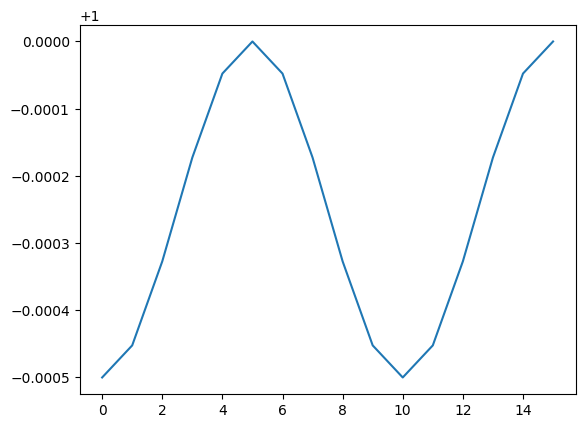

In [27]:
byol_tau_base = 0.9995
byol_tau_max = 1.0
# current_step = 50
max_training_steps = 15
cycle_steps = 5

byol_tau_list = []
for current_step in range(max_training_steps+1):
#     byol_tau = byol_tau_max - (((byol_tau_max - byol_tau_base) * (torch.cos(torch.tensor((torch.pi * current_step)/max_training_steps)) + 1)) / 2)
    byol_tau = byol_tau_max - (((byol_tau_max - byol_tau_base) * (torch.cos(torch.tensor((torch.pi * current_step)/cycle_steps)) + 1)) / 2)
    print(current_step, byol_tau.item())
    byol_tau_list.append(byol_tau)
    
plt.plot(byol_tau_list)
plt.show()

In [5]:
import torch

def check_max_value_correspondence(tensor1, tensor2):
    # Find the index of the max value in tensor1
    max_idx = torch.argmax(tensor1)

    # Convert the index to 2D coordinates
    H, W = tensor1.shape
    max_coord = (max_idx // W, max_idx % W)

    # Access the corresponding value in tensor2
    return tensor2[max_coord]

# Example tensors
tensor1_example = torch.tensor([[1.1, 0.2, 0.3], [0.4, 0.8, 0.6], [0.5, 0.7, 0.9]])
tensor2_example = torch.tensor([[False, True, True], [False, True, False], [True, False, True]])

# Check if the value at the max value of tensor1 in tensor2 is True or False
result = check_max_value_correspondence(tensor1_example, tensor2_example)
result.item()


False